In [ ]:
# https://chatgpt.com/c/672a0e6b-420c-800c-ad15-c70495a76210

import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('churn_modelling.csv')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# input data
x = df[['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts',	'HasCrCard', 'IsActiveMember',	'EstimatedSalary']]
# output data
y = df['Exited']

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


<Axes: xlabel='Exited', ylabel='count'>

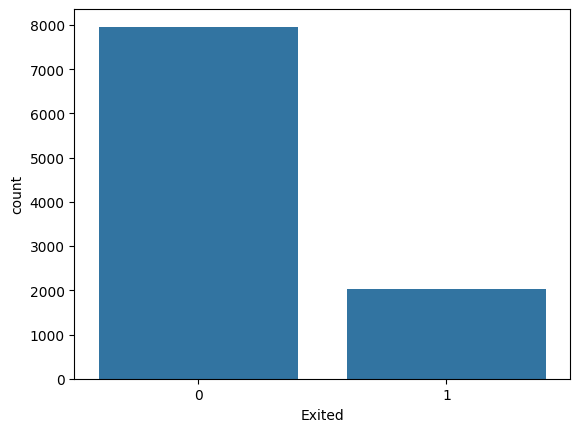

In [ ]:
sns.countplot(x=y) # 0 means they are in company, 1 means they exited the company

In [ ]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
# Balancing dataset  (Oversampler (redundant rows)) | Undersampler (reduction of rows))
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x,y = ros.fit_resample(x,y)

In [ ]:
y.value_counts()

,count
Exited,
1,7963
0,7963


In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [ ]:
x_scaled

array([[-0.29877723,  0.08418894, -1.01840607, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-1.48597169,  0.08418894,  1.03929402, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-0.96847667,  0.65128034, -0.67545605, ..., -1.53550983,
         1.08223556, -1.21851316],
       [-1.5874413 ,  0.74579558,  1.03929402, ...,  0.6512495 ,
         1.08223556,  1.42417217]])

In [ ]:
# Cross validatoin
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [ ]:
x.shape

(15926, 8)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
ann = MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=0,max_iter=1000,activation='relu')

# ann is the variable name you've chosen to store your MLPClassifier model.
# MLPClassifier is the class from scikit-learn that you're using to create the model.
# hidden_layer_sizes=(100, 100, 100):

# This parameter defines the architecture of your neural network's hidden layers.
# (100, 100, 100) means you're creating a network with three hidden layers, each containing 100 neurons.
# random_state=0:

# Similar to the RandomOverSampler, this ensures reproducibility. By setting a random state, you'll get the same results each time you run the code, as the initialization of the network's weights will be consistent.
# max_iter=1000:

# This parameter sets the maximum number of epochs (iterations) that the neural network will train for.
# In this case, the training process will stop after 1000 epochs, even if the model hasn't fully converged.
# activation='relu':

# This sets the activation function to be used in the hidden layers.
# ReLU (Rectified Linear Unit) is a popular activation function known for its effectiveness and efficiency in training deep neural networks. It introduces non-linearity into the model, which is essential for learning complex patterns.

In [ ]:
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=0)

In [ ]:
y_pred = ann.predict(x_test)

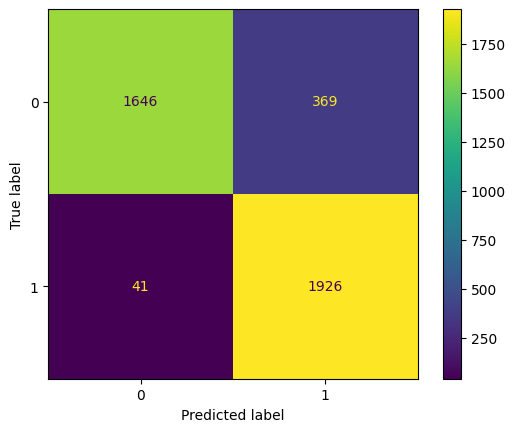

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

0.8970366649924661

In [ ]:
print(classification_report(y_test,y_pred))

# imbalance dataset is found, look at the value of recall 0.84 and 0.49, at least it should be > 80, so we've to do the improvements

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      2015
           1       0.84      0.98      0.90      1967

    accuracy                           0.90      3982
   macro avg       0.91      0.90      0.90      3982
weighted avg       0.91      0.90      0.90      3982

